SAS & HSE, Applied Time Series Forecasitng , Fall 2021 

<font color="blue"> Lesson #5: TS Foreasting using ARIMA Models </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

**Key words:** 
    - stationary TS, ARMA, ARIMA, ARMAX, SARIMAX, exogenious variables, autocorrelcation function, partial autocorrelation function
**Your feedback:**  please provide you feedback  <a href="https://forms.gle/bEV5iwmTqdM9rUoy8"> here </a>

In [2]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import math
import pandas.tseries.offsets as ofs
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools


from utils import qualityMACAPE, get_autoregrmatrix

%matplotlib inline

# ARIMA Parameters
**Questions**
  * How to make TS stationary?
  * Write down formula that describes how the tranformed ts will look like (use lag operator $\bf B$).

**Answer**
<!-- $${\bf(1-B)^d(1-B^s)^D} {\bf BoxCox_{\lambda}} (y_t)$$
where $s~-$ seasonality period -->


 




## ARIMA model for non-stationary time series
In order to make ts stationary we apply trend ${\bf(1-\bf B)}$ differencing $d$ times and seasonal ${\bf(1-B^s)}$ differencing $D$ times.


**Main hypothesys**: exists $d$, $D$, $\lambda$ such that
  
  * $$ {\bf(1-B)^d(1-B^s)^D} {\bf BoxCox_{\lambda}} (y_t)~- \text{ stationary} $$ 


Final ts model:
* Lets denote: ${\bf BoxCox_{\lambda}} (y_t) = z_t$
* classic form:
$$\color{red}{\underbrace{\bf(1-B)^d(1-B^s)^D}\limits_{I}}z_t = \underbrace{c+\sum_{i=1}^{p} \alpha_iy_{t-i}}\limits_{AR}+\underbrace{\sum_{j=1}^{q} \beta_j\varepsilon_{t-j}}\limits_{MA}+\varepsilon_t$$

* or in canonical form:

$$\underbrace{\phi\left({\bf B}\right)}\limits_{AR}\color{red}{\underbrace{\bf(1-B)^d(1-B^s)^D}\limits_{I}}(z_t-\mu) = \underbrace{\theta\left(\bf B\right)}\limits_{MA}\varepsilon_t.$$

* $\varepsilon_t$- random variable from $N(0, \sigma^2)$, $E\varepsilon_t=0, ~E\varepsilon_i\varepsilon_j=0$

## Fitting Parameters of ARIMA model

Classic form of ARIMA model implies that there are some seasonal Autoregression and Moving Average Components


$${\bf(1-B)^{\color{red}{d}}(1-B^s)^{\color{red}D}}y_t = \underbrace{c+\sum_{i=1}^{\color{red}p} \alpha_iy_{t-i}}\limits_{AR}+\underbrace{\sum_{j=1}^{\color{red}q} \beta_j\varepsilon_{t-j}}\limits_{MA}+\underbrace{\sum_{l=1}^{\color{red}P} \delta_ly_{t-\color{red}{s\cdot l}}}\limits_{seasonal~AR}+\underbrace{\sum_{m=1}^{\color{red}Q} \beta_j\varepsilon_{t-\color{red}{s*m}}}\limits_{seasonal~MA}+\varepsilon_t$$


Classic ARIMA model is discribed with 6 parameters:
$$ARIMA(p, d, q)\times(P, D, Q)_s$$
where

 - $p~-$ is a number of non-seasonal AR components
 - $q~-$ is a number of non-seasonal MA components
 - $d~-$ is a number of trend-differencing applied to make ts stationary
 - $P~-$ is a number of seasonal AR components
 - $Q~-$ is a number of seasonal MA components
 - $D~-$ is a number of seasonal-differencing to make ts stationary

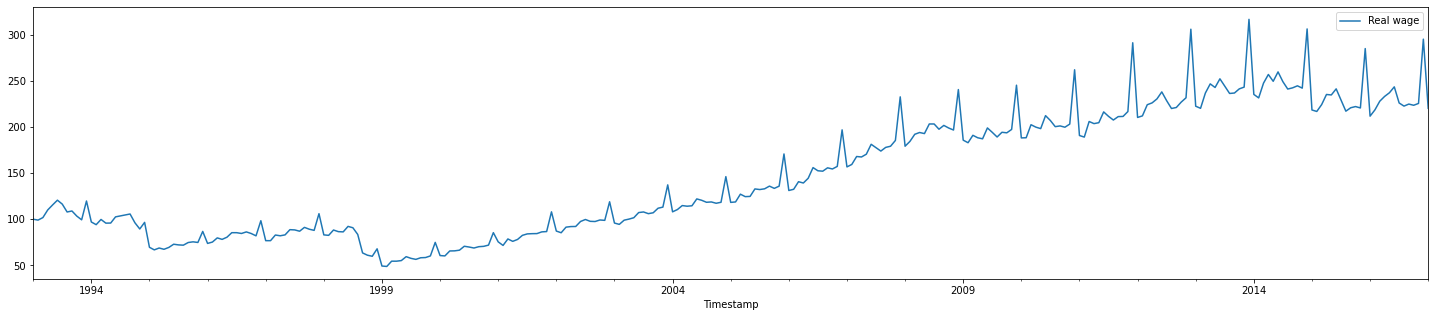

In [3]:
# Wage
ts_wage = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')
ts_wage.index.names=['Timestamp']
ts_wage.plot(figsize = (25,5))

In [ ]:
# seasonal differencing
p = 12
sdiff_ts_wage_boxcox = (ts_wage_boxcox['wage_boxcox'] - ts_wage_boxcox['wage_boxcox'].shift(p))[p:]
sdiff_ts_wage_boxcox.plot(figsize=(15,6))

diff_sdiff_ts_wage_boxcox = (sdiff_ts_wage_boxcox  - sdiff_ts_wage_boxcox .shift(1))[1:]
diff_sdiff_ts_wage_boxcox.plot(figsize=(15,6))

# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(np.array(diff_sdiff_ts_wage_boxcox))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

# Augmented Dickey-Fuller unit root test
df_stat = stattools.adfuller(np.array(diff_sdiff_ts_wage_boxcox))
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

In [4]:
# # ts = pd.read_csv('data/TimeSeries_Data10.csv', sep=',', decimal='.',parse_dates={'Timestamp': pd.to_datetime(['Dates'],dayfirst=True, errors='coerce')}, index_col='Timestamp')
# ts = pd.read_csv('../1_ts_esm/data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
# ts.index.names=['Timestamp']
# # ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
# ts = ts.sort_index() # sort index
# ts.head()
# ts.loc['2007-01-01':'2008-01-01', ts.columns[range(3)]].plot(figsize=(25,5))


,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** Practice:** plot dependence energy comsumption volume on dayofweek (use pandas.pivot)

# Training ARIMA models

## ARMA for forecasing Retail Time Series

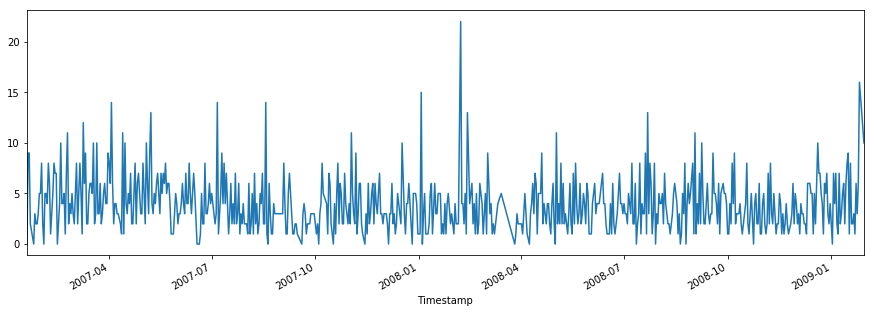

In [ ]:
# удаляем пропуски: иначе нельзя
dta = ts[ts.columns[0]].dropna()
dta.plot(figsize=(15,5))

In [ ]:
# test for stationarity
kpss_stat= stattools.kpss(np.array(dta))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.509193, 
pvalue: 0.04 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


It can be assumed that TS is stationary

** Question **
   * How to choose parameters $p$ and $q$ for ARMA model?

## Autocorrelation analysis
  
    
**Autocorrelation coeficient:**
### $$ r_\tau = r_{y_t y_{t+\tau}} = \frac{\sum\limits_{t=1}^{T-\tau} \left(y_t - \bar{y}\right)\left(y_{t+\tau} - \bar{y}\right) }{ \sum\limits_{t=1}^T \left(y_t - \bar{y}\right)^2 },\;\; \bar{y} = \frac1{T} \sum_{t=1}^T y_t.$$
		
$r_\tau \in\left[-1,1\right], \;\; \tau$ - autocorrelation lag.

**Coefficient of partial correlation:** between $y$, $x_1$ excluding dependence on $x_2$:

<img src='https://github.com/aromanenko/ATSF/blob/main/pic/PACF.PNG'>

<span style="color:red">Coefficient of partial correlation</span> shows correlation between $y_t$ and $y_{t-k}$, <span style="color:red">excluding dependence on </span>
   - $y_t$ ($y_{t-k}$)  and $y_{t-1}$
   - $y_t$ ($y_{t-k}$) and $y_{t-2}$
   
   ...
   
   - $y_t$ ($y_{t-k}$) and $y_{t-(k-1)}$    


**Main rule **: 
   * $q$: the number of the last lag $\tau<S$ at which <span style="color:red"> ACF </span> was significant ($S$ - period of seasonality)
   * $p$: the number of the last lag $\tau<S$ at which <span style="color:red">PACF</span> was significant

Example1 : ACF and PACF for AR(1) model
<img src='https://github.com/aromanenko/ATSF/blob/wip/pic/AR1.png?raw=1'>

Example2 : ACF and PACF for AR(2) model
<img src='https://github.com/aromanenko/ATSF/blob/wip/pic/AR2.png?raw=1'>


Example3 : ACF and PACF for MA(1) model
<img src='https://github.com/aromanenko/ATSF/blob/wip/pic/MA2_1.png?raw=1'>


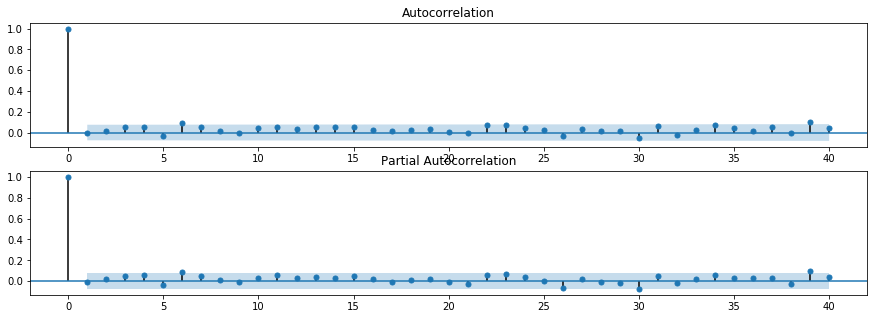

In [ ]:
# Use Item 165
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)

* try just simple ARMA models (p=0, q=0)

In [ ]:
arma_mod00 = sm.tsa.ARMA(dta, (0,0)).fit()
print(arma_mod00.params)
print(arma_mod00.aic, arma_mod00.bic, arma_mod00.hqic)

Series([], dtype: float64)
3299.63826265 3308.69417849 3303.14263934


In [ ]:
arma_mod01 = sm.tsa.ARMA(dta, (0,1)).fit()
print(arma_mod01.params)
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)

const               3.910795
ma.L1.Item:  165   -0.006996
dtype: float64
3301.603847883614 3315.18772164 3306.86041291


In [ ]:
arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit()
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

const               3.910796
ar.L1.Item:  165   -0.007255
dtype: float64
3301.602584786089 3315.18645854 3306.85914981


## Analyse Residuals to proof the model

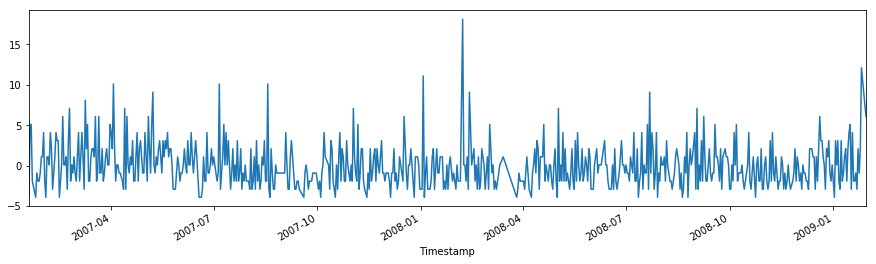

In [ ]:
# plot residuals
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax = arma_mod00.resid.plot(ax=ax, figsize=(15,4));

### Stationarity test

In [ ]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(arma_mod00.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.509193, 
pvalue: 0.04 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


It can be assumed that TS is stationary

### Autocorrelation test

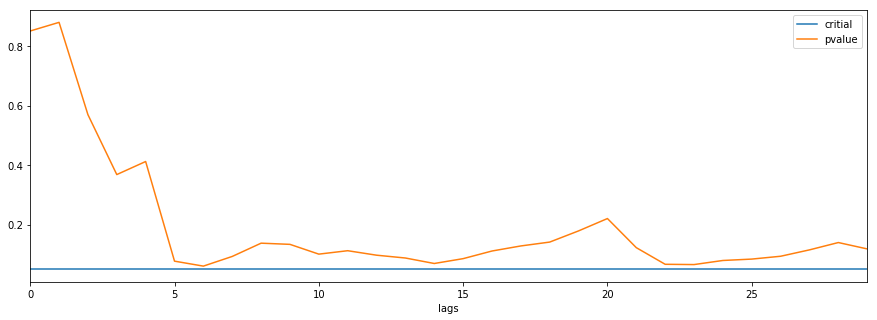

In [ ]:
# Ljung-Box test 
pd.DataFrame({'lags':range(30), 'pvalue':sm.stats.diagnostic.acorr_ljungbox(arma_mod00.resid.values, lags=30)[1], 
              'critial':np.array([0.05]*30)}).set_index('lags').plot(figsize=(15,5))
# plt.plot(sm.stats.diagnostic.acorr_ljungbox(arma_mod00.resid.values, lags=30)[1],'b')

Values of the TS are not correlated

### Unbiasedness test

In [ ]:
# Darbin_Watson statistic
sm.stats.durbin_watson(arma_mod00.resid.values)

2.0038098857004782

In [ ]:
stat = stats.wilcoxon(arma_mod00.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 112078.000000
pvalue: 0.33


Residuals are not biased!

### Normality test

In [ ]:
stats.normaltest(arma_mod00.resid)

NormaltestResult(statistic=212.46951827279702, pvalue=7.2917256619287168e-47)

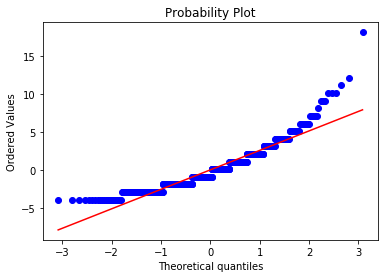

In [ ]:
## q-qPlot
fig = plt.figure()
res = stats.probplot(arma_mod00.resid, dist="norm", plot=pylab)

* Hypothesis of normality can be rejected

### Forecast of Validation Period

In [ ]:
frc_arma = arma_mod01.predict('2008-12-30', '2008-12-31', dynamic=False)
print(frc_arma)

Timestamp
2008-12-30    3.917016
2008-12-31    3.924208
dtype: float64


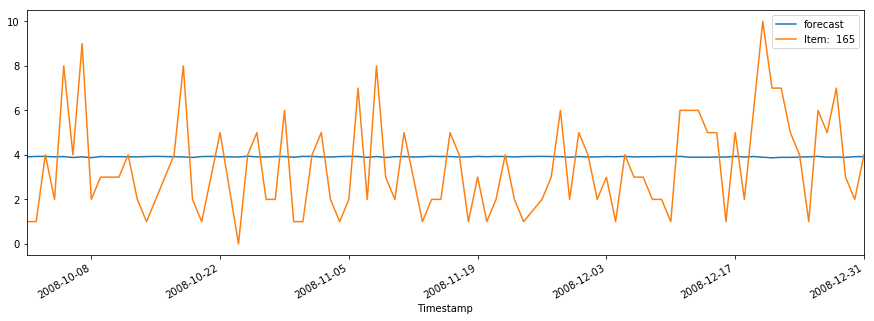

In [ ]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arma_mod01.plot_predict(start='2008-10-01', end='2008-12-31', ax=ax)

### Forecast of Future Period

In [ ]:
frc_arma = arma_mod01.forecast(steps=185)
print(frc_arma[1])

[ 2.69158051  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2

# Using exogenous variables in ARIMA models

<h1 align="center"> ARIMAX for energy consumption </h1>

## Energy Consumption

In [5]:
# energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates={'Timestamp': pd.to_datetime('Date', errors='coerce')}, index_col='Timestamp')
energy_ts = pd.read_csv('../2_ts_arima/data/energy_consump.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
energy_ts.index.names=['Timestamp']
energy_ts.head()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Filter only Hub=Center and ZSP=FZSZOE27
energy_ts= energy_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]
energy_ts.tail()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2015-05-23,Center,FZSZOE27,NaN,11.7,11.9,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,Center,FZSZOE27,NaN,12.4,12.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,Center,FZSZOE27,NaN,16.2,15.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,Center,FZSZOE27,NaN,18.7,17.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-27,Center,FZSZOE27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


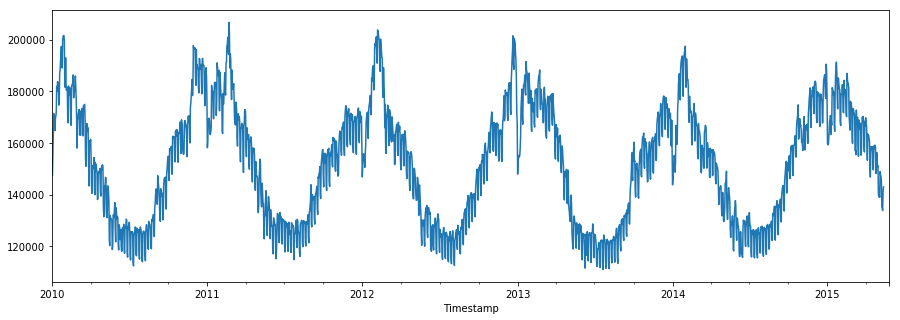

In [7]:
# See Year-Seasonality
energy_ts['EnergyConsump'].plot(figsize=(15,5))

# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_YearSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

**Questions** 
    - Which components of TS do you see?
    - Are there any dependences on other variables?
    - Is that TS stationary? Why?

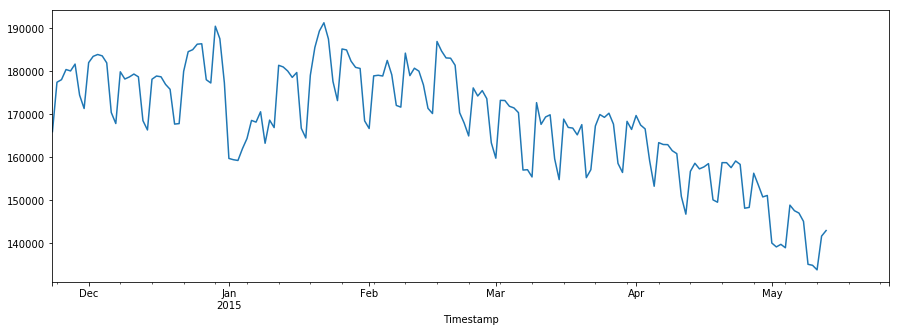

In [8]:
# See Week easonality
energy_ts['EnergyConsump'].tail(186).plot(figsize=(15,5))

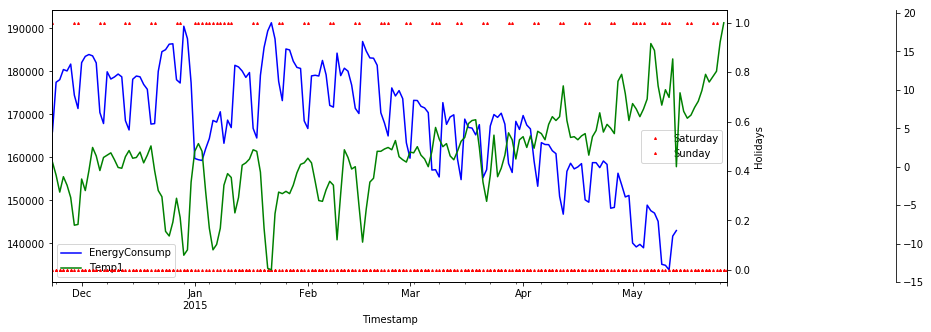

In [9]:
# See dependence on other varibales
fig, ax = plt.subplots(figsize=(15,5))
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

energy_ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
energy_ts[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
energy_ts['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() #  ax2.get_lines() 
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) # 
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

In [83]:
# Stationary test
kpss_stat= stattools.kpss(np.array(dta))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.509193, 
pvalue: 0.04 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


# Forecasting with ARMAX

** Question: **
* What is SARIMA?
* What is ARIMAX?
* Give examples of TS that depends on exogenious variables.

## SARIMA

SARIMA $(p,d,q)\times (P,D,Q)_s$:

### $$ (1-B)^{d} (1-B^s)^{\color{red}{D}} y_t=z_t$$

### $$z_t = \underbrace{\mu +\sum_{i=1}^{p} \alpha_i \left(\sum_{k=1}^{\color{red}{P}}\delta_pB^{\color{red}{s}\cdot k}\right) z_{t-i}}\limits_{AR} +\underbrace{\sum_{j=1}^{q} \beta_j\left(\sum_{l=1}^{\color{red}{Q}}\gamma_jB^{\color{red}{s}\cdot l}\right)\varepsilon_{t-j}}\limits_{MA}+\varepsilon_t$$

In operator view:

### $$\Phi_P\left(B^s\right)\phi_p\left(B\right)\nabla^D_s \nabla^d z_t = \Theta_Q\left(B^s\right)\theta_q\left(B\right)\varepsilon_t$$

ARIMAX $(p,d,q)\times (P, D, Q)_s \times \{x_j\}_{j=1}^k$
### $$\Phi_P\left(B^s\right)\phi_p\left(B\right)\nabla^D_s \nabla^d z_t = \Theta_Q\left(B^s\right)\theta_q\left(B\right)\varepsilon_t$$

###    $$+$$

###    $$y_t = \sum\limits_{j=1}^k \beta_j x_{jt} + z_t$$

###    $$=$$

###    $$\Phi_P\left(B^s\right)\phi_p\left(B\right)\nabla^D_s \nabla^d \left(y_t - \sum\limits_{j=1}^k \beta_j x_{jt}\right) = \Theta_Q\left(B^s\right)\theta_q\left(B\right)\varepsilon_t.$$

** Scheme for forecasting with ARIMAX**: 
* 0) Check stationarity of TS and exogenios variables:
   - if there is non-stationarity, shift to differences; 
   - for the sake of easier interpretation the difference operator should also be applied to exogenious variables;
   - <span style="color:red">start always with seasonal differencing!</span>
* 1) A regression is built for the differences of TS and exogenious variables
* 2) A suitable model $ARMA\left(p_1,q_1\right)$ for residuals of regression $\hat{z}_t$ is selected.
* 3) Regression is rebuilt in supposition that the errors are described by model $ARMA\left(p_1,q_1\right)$.
* 4) Residuals $\hat{\varepsilon}_t$ are analyzed.
* 5) Forecast is build for initial TS 

with SARIMA:
* A regression is built for the time series of differences 
   - errors are described by a model of initial approximation;
   - as a rule it is either $AR(2)$ or $SARMA(2,0)\times(1,0)_s$

In [10]:
energy_ts.columns

Index(['Hub', 'ZSP', 'EnergyConsump', 'Temp1', 'Temp2', 'Temp3', 'Temp4',
       'Temp5', 'Temp6', 'Temp7', 'Saturday', 'Sunday', 'Temp1_South_Less',
       'Temp2_South_Less', 'Temp3_South_Less', 'Temp4_South_Less',
       'Temp1_South_Gr', 'Temp2_South_Gr', 'Temp3_South_Gr', 'Temp4_South_Gr'],
      dtype='object')

In [27]:
# replace all NaN values
dta = energy_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna()

## 0) Check stationarity of TS and exogenios variables

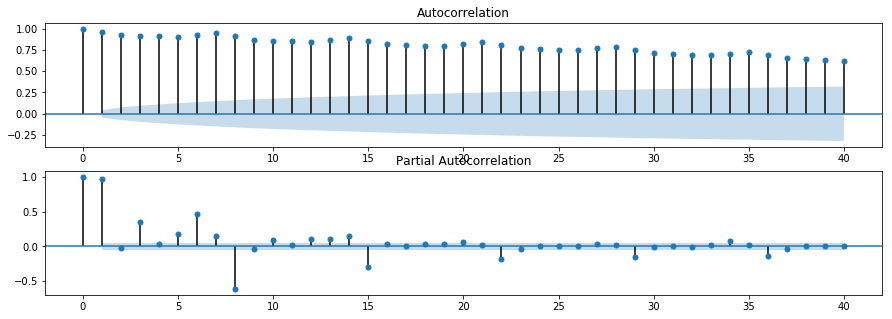

In [28]:
# acf
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta['EnergyConsump'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta['EnergyConsump'].values.squeeze(), lags=40, ax=ax2)

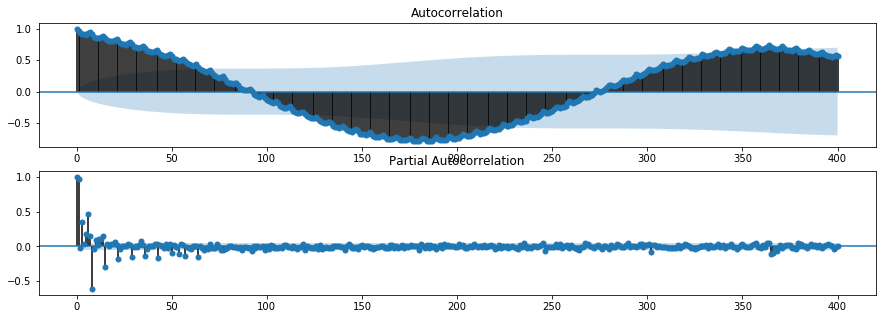

In [29]:
# acf
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta['EnergyConsump'].values.squeeze(), lags=400, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta['EnergyConsump'].values.squeeze(), lags=400, ax=ax2)

** Question **
 - Can we use thiss ACF, PACF for choosing p,q?

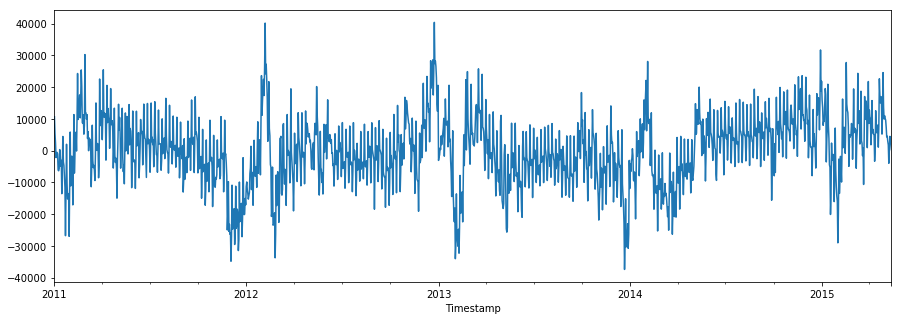

In [30]:
# Differencing
p = 365
shift365_energy = (dta - dta.shift(p))[p:]
shift365_energy['EnergyConsump'].plot(figsize=(15,5))

** Question:**
 * Is this TS stationary?
   - Hint: see picture below.

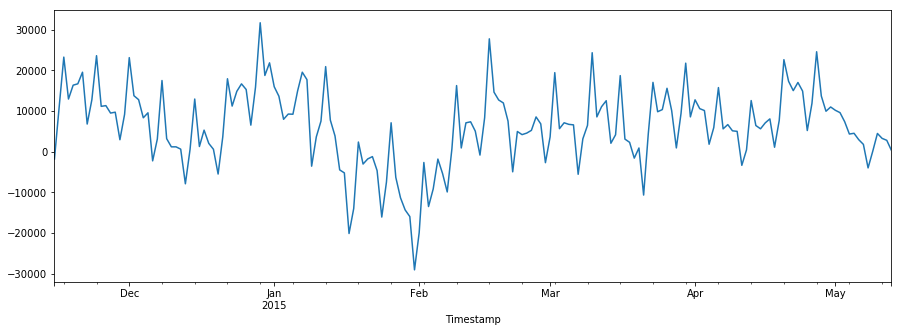

In [31]:
shift365_energy['EnergyConsump'].tail(180).plot(figsize=(15,5))

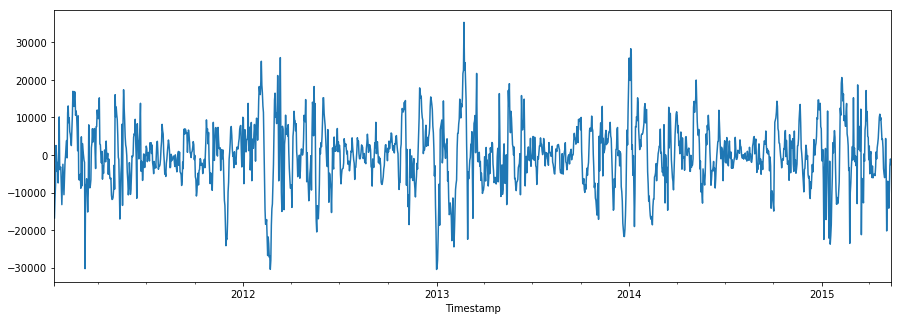

In [32]:
p=7
dif7_shift365_energy = (shift365_energy - shift365_energy.shift(p))[p:]
dif7_shift365_energy['EnergyConsump'].plot(figsize=(15,5))

** Question:**
 * Is this TS stationary?

In [33]:
# Stationary test
kpss_stat= stattools.kpss(np.array(dif7_shift365_energy['EnergyConsump']))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.009940, 
pvalue: 0.10 
maximal Lag: 24 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning:

p-value is greater than the indicated p-value



* It seems that TS is stationary
** Question: ** 
  * Are TS for exogenious variables stationary?

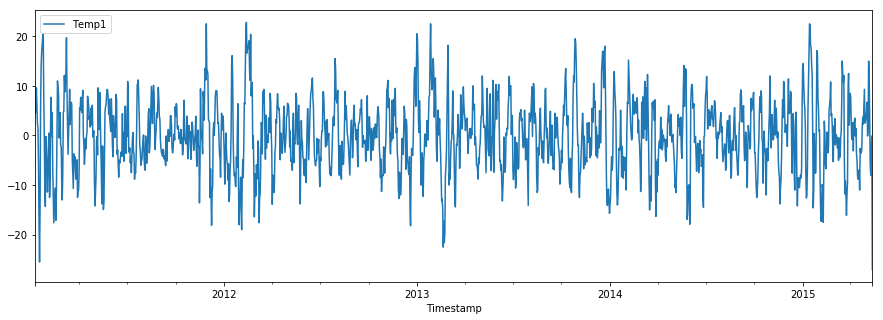

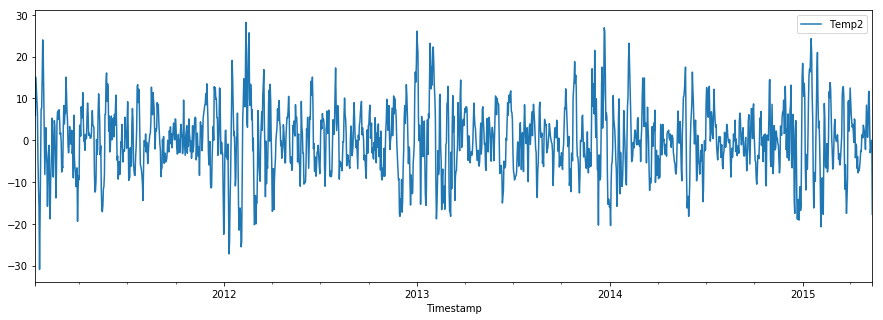

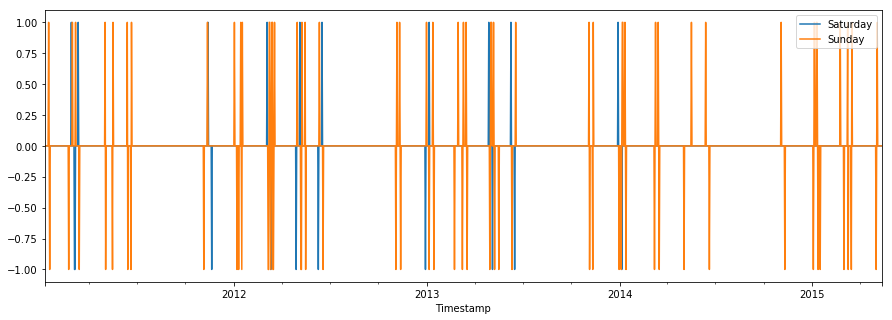

In [41]:
# plot grap for the individual variables
dif7_shift365_energy[['Temp1']].plot(figsize=(15,5))
dif7_shift365_energy[['Temp2']].plot(figsize=(15,5))
dif7_shift365_energy[['Saturday', 'Sunday']].plot(figsize=(15,5))

In [45]:
# TODO: build KPSS test for all exog variables
kpss_stat= stattools.kpss(np.array(dif7_shift365_energy['Temp1']))
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.008394, 
pvalue: 0.10 
maximal Lag: 24 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning:

p-value is greater than the indicated p-value



## 1) A regression is built for the differences of TS and exogenious variables

In [47]:
# apply regression for defferenced TS
exogs = dif7_shift365_energy[['Temp1', 'Temp2', 'Saturday','Sunday']][dif7_shift365_energy.index<'2015-05-01']
extra_exogs = dif7_shift365_energy[['Temp1', 'Temp2', 'Saturday','Sunday']]
ts = dif7_shift365_energy[['EnergyConsump']][dif7_shift365_energy.index<'2015-05-01']

In [68]:
# Only regressors
arima_mod000 = sm.tsa.ARIMA(ts, (0,0,0), exog=exogs).fit()
print(arima_mod000.params)
print(arima_mod000.aic, arima_mod000.bic, arima_mod000.hqic)

const          36.114920
Temp1        -455.754651
Temp2         -94.747830
Saturday    -8821.376321
Sunday     -10395.544799
dtype: float64
32194.2320784 32226.4003309 32206.1870399


## 2) A suitable model  $ARMA(p1,q1)$ for residuals of regression  $z_t$  is selected 
** Caution: we forget seasonality **

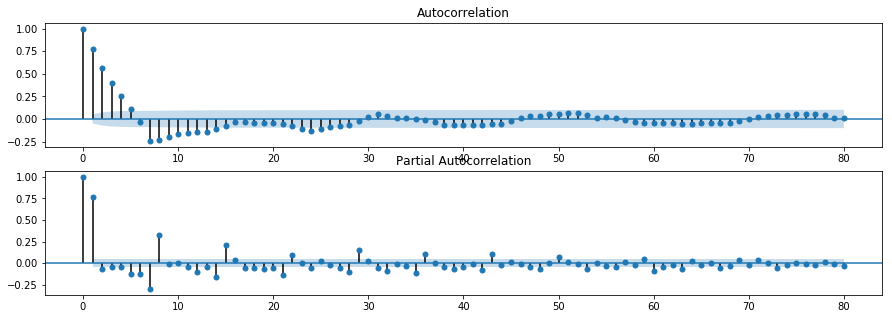

In [51]:
# acf for difference TS
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod000.resid.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod000.resid.values.squeeze(), lags=80, ax=ax2)

** Question:**
   * What are candidates for p and q?
       - candidates values for p - 1 
       - candidates values for q - 7 

## 3) Regression is rebuilt in supposition that the errors are described by model ARMA(p1,q1)

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



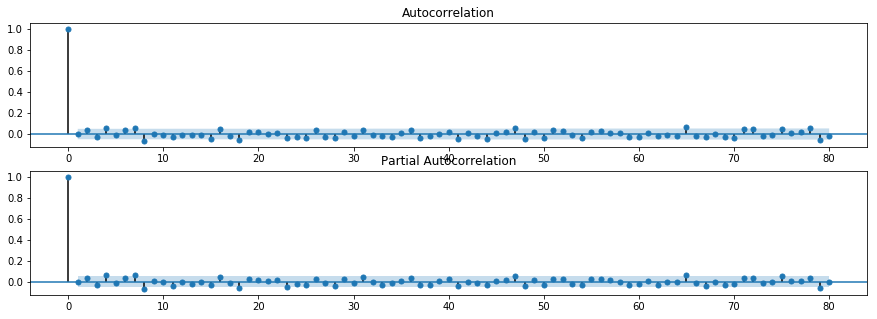

In [52]:
arima_mod107 = sm.tsa.ARIMA(ts, (1,0,7), exog=exogs).fit()
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod107.resid.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod107.resid.values.squeeze(), lags=80, ax=ax2)

* Is seems  there is no more lags to take into account
* Let's analyse resudials

## 4) Residuals $\varepsilon_t$  are analyzed.

### Stationarity

In [53]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(arima_mod107.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.281045, 
pvalue: 0.10 
maximal Lag: 24 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning:

p-value is greater than the indicated p-value



* Residuals are stationary

### Autocorrelation test

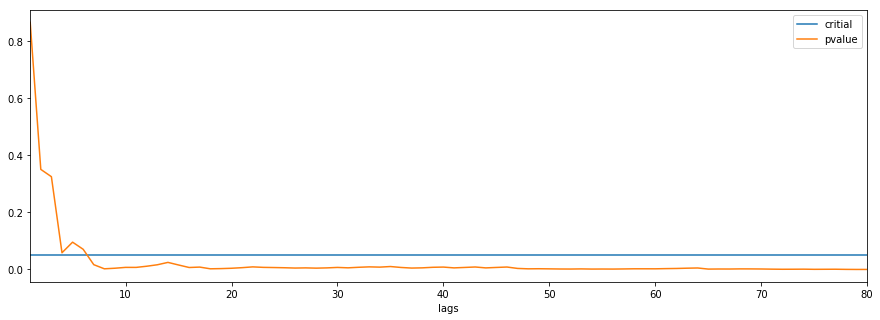

In [57]:
# Ljung-Box test 
pd.DataFrame({'lags':range(1,81,1), 'pvalue':sm.stats.diagnostic.acorr_ljungbox(arima_mod107.resid.values, lags=80)[1], 
              'critial':np.array([0.05]*80)}).set_index('lags').plot(figsize=(15,5))
# plt.plot(sm.stats.diagnostic.acorr_ljungbox(arma_mod00.resid.values, lags=30)[1],'b')

For lags 1-6 residuals are not correlated, but for lags 7 and grater seems residuals are correlated

### Unbiasedness test

In [58]:
# Darbin_Watson statistic
sm.stats.durbin_watson(arima_mod107.resid.values)

1.9894606433277848

Residuals are not biased!

### Normality test

In [60]:
stats.normaltest(arima_mod107.resid)

NormaltestResult(statistic=117.77930740670955, pvalue=2.6579594769708018e-26)

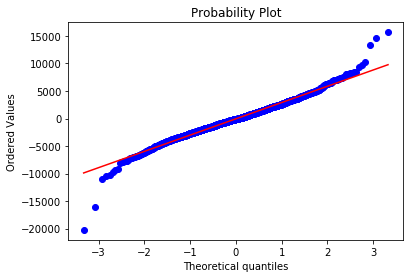

In [62]:
## q-qPlot
fig = plt.figure()
res = stats.probplot(arima_mod107.resid, dist="norm", plot=pylab)

* Hypothesis of normality can be rejected

In [63]:
print(arima_mod107.summary())

                              ARMA Model Results                              
Dep. Variable:          EnergyConsump   No. Observations:                 1574
Model:                     ARMA(1, 7)   Log Likelihood              -14814.580
Method:                       css-mle   S.D. of innovations           2943.728
Date:                Sun, 24 Sep 2017   AIC                          29657.160
Time:                        19:21:47   BIC                          29732.219
Sample:                    01-08-2011   HQIC                         29685.055
                         - 04-30-2015                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  39.9348     52.097      0.767      0.443     -62.173     142.043
Temp1                 -87.4075     27.312     -3.200      0.001    -140.939     -33.876
Temp2           

## 5) Forecast is build for initial TS

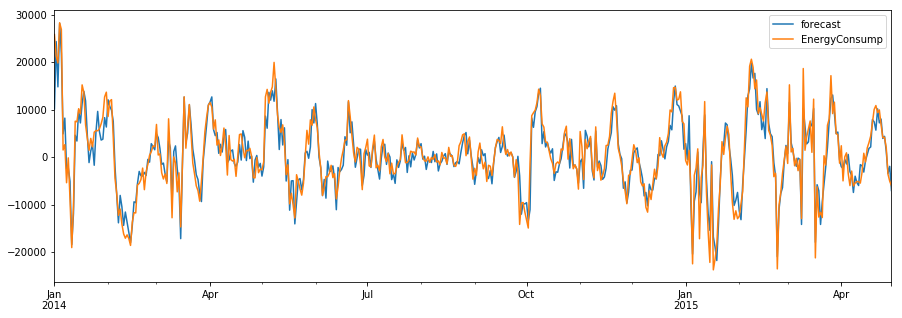

In [64]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arima_mod107.plot_predict(start='2014-01-01', end='2015-04-30', ax=ax)
# legend = ax.legend(loc='upper left')

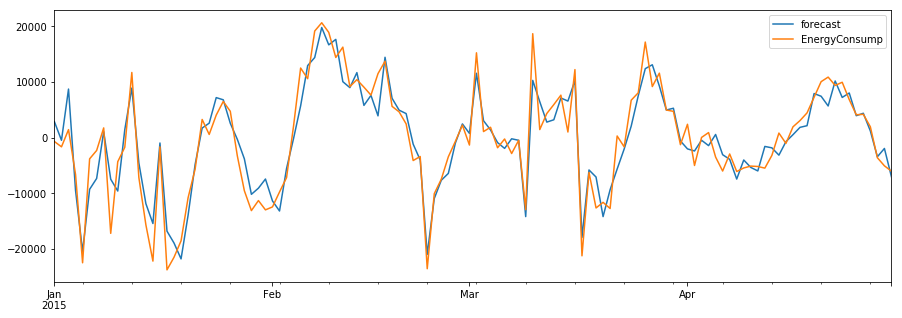

In [65]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arima_mod107.plot_predict(start='2015-01-01', end='2015-04-30', ax=ax)

In [66]:
# fig, ax = plt.subplots(figsize=(15,8),  linewidth=3.0)
# fig = arima_mod710_ex.plot_forecast(185)
frc = arima_mod107.forecast(steps = 13, exog = extra_exogs[extra_exogs.index>='2015-05-01'])

In [80]:
frc_arimax = extra_exogs[extra_exogs.index>='2015-05-01']
frc_arimax['FRC'] = frc[0]
# frc_arimax['EnergyConsump'] = ts[ts.index>='2015-05-01'] 

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



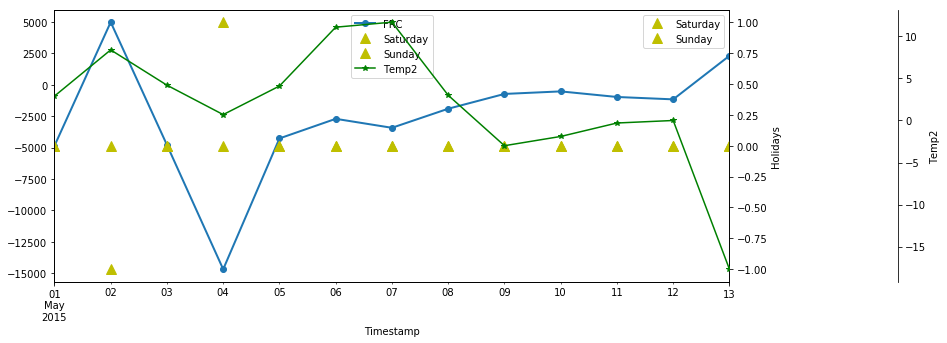

In [81]:
fig, ax = plt.subplots(figsize=(15,5))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.set_ylabel('Temp2')
fig.subplots_adjust(right=0.75)

frc_arimax[['FRC']].tail(186).plot(ax = ax,marker = 'o', linewidth=2.0)
frc_arimax[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='y', marker = '^', markersize = 10.0, linewidth=0.0)
frc_arimax['Temp2'].tail(186).plot(ax = ax3,  style='g-', marker='*')

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')

In [ ]:
# Practice: build the forecast of original TS


In [ ]:
# Practice: calculate MAPE for dates > 2015-05-01


<h1 align="center">Forecasting with SARIMAX </h1>

** Question: ** 
 * What is the period of seasonality for this TS? Another way to say: what are specifications of ARIMA model for this TS:
    - ARIMA (2,0,7)x(1,0,1)_365
    - ARIMA (2,0,0)x(52,0,52)_7

We will apply p=7 to ts shift365_energy instead of p=365 to orifinal ts
    - use additional exogenious variable that correspond seasonality p=365

## 1) A regression is built for the differences of TS and exogenious variables

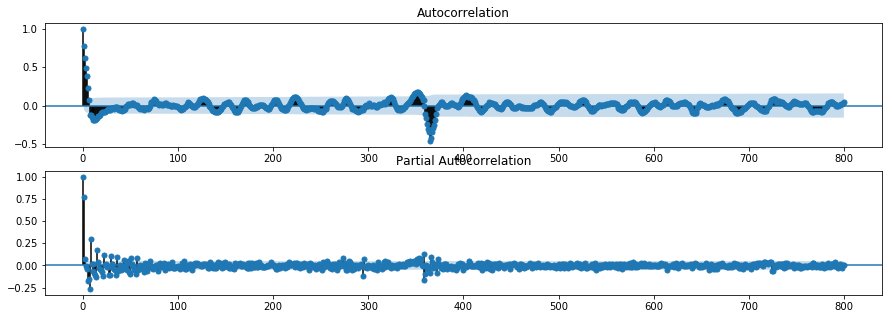

In [85]:
# acf for stationary TS
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dif7_shift365_energy['EnergyConsump'].values.squeeze(), lags=800, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dif7_shift365_energy['EnergyConsump'].values.squeeze(), lags=800, ax=ax2)

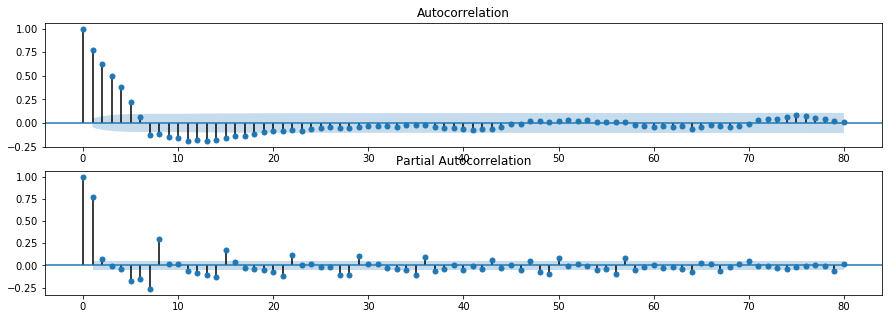

In [82]:
# acf for stationary TS
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dif7_shift365_energy['EnergyConsump'].values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dif7_shift365_energy['EnergyConsump'].values.squeeze(), lags=80, ax=ax2)

** Question:**
* What are candidates for p and q?
    - candidates values for p - 1, 
    - candidates values for q - 0,
    - candidates values for P - 1, 2, 52
    - candidates values for Q - 1, 2, 52
* Apply SARIMA to shift365_energy TS: 
    - what is value for d, D?

In [87]:
# apply regression for defferenced TS
exogs = shift365_energy[['Temp1', 'Temp2', 'Saturday','Sunday']][shift365_energy.index<'2015-05-01']
extra_exogs = shift365_energy[['Temp1', 'Temp2', 'Saturday','Sunday']]
ts = shift365_energy[['EnergyConsump']][shift365_energy.index<'2015-05-01']

## 2) A suitable model  $ARMA(p1,q1)$ for residuals of regression  $z_t$  is selected 

In [127]:
def my_func(ts, p,d,q,P,D,Q): 
    try:
        mod = sm.tsa.statespace.SARIMAX(ts, trend='n', order=(p,d,q), seasonal_order=(P,D,Q,7))
        results = mod.fit()
        return("sarimax_%i%i%i_%i%i%i: aic=%f, bic=%f, hqic=%f " % (p,d,q,P,D,Q, 
               results.aic, results.bic, results.hqic))
    except Exception:
        return ("sarimax_%i%i%i_%i%i%i: can't fit model " % (p,d,q,P,D,Q))    

In [130]:
from sklearn.grid_search import ParameterGrid
param_grid = {'p': [1], 'd' : [0],
             'q': [0], 'P' : [1,2],
             'D': [1], 'Q' : [1,2,52]}

grid = ParameterGrid(param_grid)

for params in grid:
    print(my_func(ts,params['p'], params['d'], params['q'], params['P'], params['D'], params['Q']))

sarimax_100_111: aic=30629.723649, bic=30651.186900, hqic=30637.698444 


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



sarimax_100_112: aic=30809.013701, bic=30835.842766, hqic=30818.982195 
sarimax_100_1152: can't fit model 


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



sarimax_100_211: aic=30631.587209, bic=30658.416273, hqic=30641.555703 


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



sarimax_100_212: aic=30810.265846, bic=30842.460723, hqic=30822.228038 
sarimax_100_2152: can't fit model 


In [133]:
# Caution takes a lot of time
param_grid = {'p': [1], 'd' : [0],
             'q': [0], 'P' : [52],
             'D': [1], 'Q' : [1, 2,52]}

grid = ParameterGrid(param_grid)

for params in grid:
    print(my_func(ts,params['p'], params['d'], params['q'], params['P'], params['D'], params['Q']))

KeyboardInterrupt: 

## 3) Regression is rebuilt in supposition that the errors are described by model ARMA(p1,q1)

In [143]:
sarimax_100_111 = sm.tsa.statespace.SARIMAX(ts, trend='n', 
                                            order=(1,0,0), seasonal_order=(1,1,1,7), exog=exogs).fit()

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



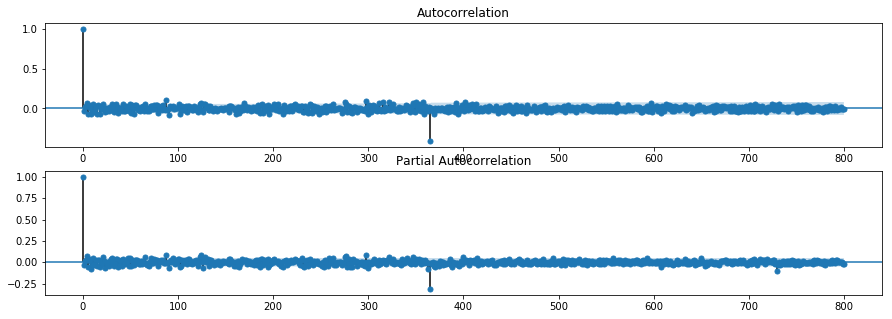

In [140]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_100_111.resid.values.squeeze(), lags=800, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_100_111.resid.values.squeeze(), lags=800, ax=ax2)

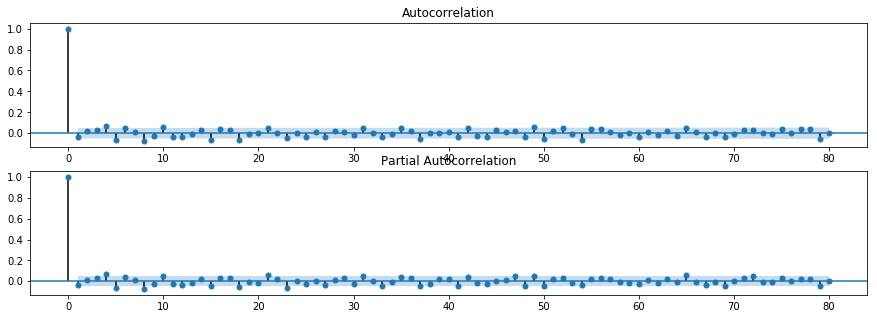

In [139]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_100_111.resid.values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_100_111.resid.values.squeeze(), lags=80, ax=ax2)

* Let's fit model for q=5

In [142]:
sarimax_105_111 = sm.tsa.statespace.SARIMAX(ts, trend='n', 
                                            order=(1,0,5), seasonal_order=(1,1,1,7), exog=exogs).fit()

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\tools.py:405: RuntimeWarning:

invalid value encountered in sqrt



ValueError: array must not contain infs or NaNs

* Is seems  there is no more lags to take into account (insead of lag 365 - you need to add in into exogenious) 
* Let's analyse resudials

## 4) Residuals $\varepsilon_t$  are analyzed.

### Stationarity

In [144]:
# Kwiatkowski–Phillips–Schmidt–Shin
kpss_stat= stattools.kpss(sarimax_100_111.resid.values)
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.377998, 
pvalue: 0.09 
maximal Lag: 24 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


* Residuals are stationary

### Autocorrelation test

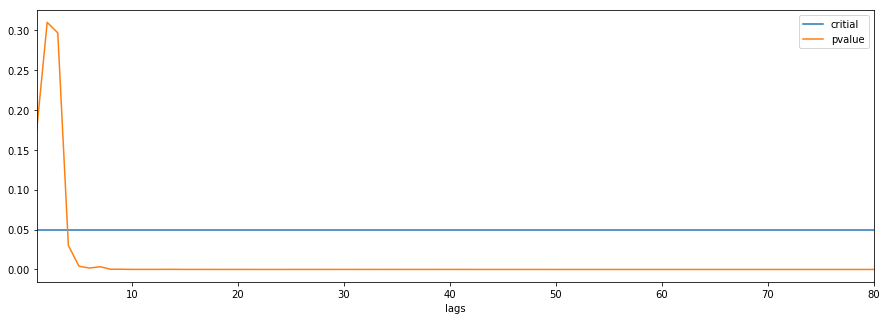

In [146]:
# Ljung-Box test 
pd.DataFrame({'lags':range(1,81,1), 'pvalue':sm.stats.diagnostic.acorr_ljungbox(sarimax_100_111.resid.values, lags=80)[1], 
              'critial':np.array([0.05]*80)}).set_index('lags').plot(figsize=(15,5))
# plt.plot(sm.stats.diagnostic.acorr_ljungbox(arma_mod00.resid.values, lags=30)[1],'b')

For lags 1-6 residuals are not correlated, but for lags 7 and grater seems residuals are correlated

### Unbiasedness test

In [147]:
# Darbin_Watson statistic
sm.stats.durbin_watson(sarimax_100_111.resid.values)

2.0623514566086008

Residuals are not biased!

### Normality test

In [148]:
stats.normaltest(sarimax_100_111.resid)

NormaltestResult(statistic=124.79153577361377, pvalue=7.9774173364255483e-28)

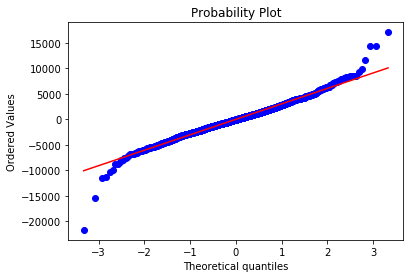

In [149]:
## q-qPlot
fig = plt.figure()
res = stats.probplot(sarimax_100_111.resid, dist="norm", plot=pylab)

* Hypothesis of normality can be rejected

In [151]:
print(sarimax_100_111.summary())

                                 Statespace Model Results                                
Dep. Variable:                     EnergyConsump   No. Observations:                 1581
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 7)   Log Likelihood              -14868.708
Date:                           Mon, 25 Sep 2017   AIC                          29753.416
Time:                                   18:52:06   BIC                          29796.343
Sample:                               01-01-2011   HQIC                         29769.366
                                    - 04-30-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        112.7736     30.711      3.672      0.000      52.582     172.965
Temp2       -218.8168     28.248     -7.746

## 5) Forecast is build for initial TS

### Retrospective forecast
The predict command is first applied here to get in-sample predictions. We use the full_results=True argument to allow us to calculate confidence intervals (the default output of predict is just the predicted values).
With no other arguments, predict returns the one-step-ahead in-sample predictions for the entire sample.

In [160]:
predict = sarimax_100_111.get_prediction()
predict_ci = predict.conf_int() # confidence interval

One-step-ahead prediction uses the true values of the endogenous values at each step to predict the next in-sample value. Dynamic predictions use one-step-ahead prediction up to some point in the dataset (specified by the dynamic argument); after that, the previous predicted endogenous values are used in place of the true endogenous values for each new predicted element.

In [158]:
#  Dynamic predictions
predict_dy = sarimax_100_111.get_prediction(dynamic='2014-01-01')
predict_dy_ci = predict_dy.conf_int() # confidence interval

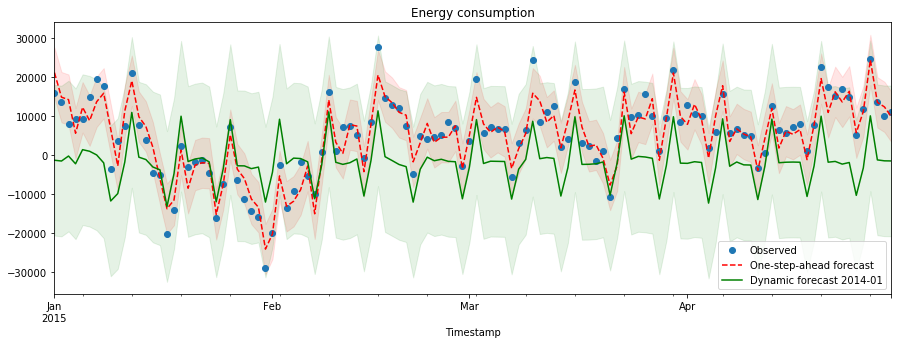

In [167]:
# Graph
fig, ax = plt.subplots(figsize=(15,5))
npre = 4
ax.set(title='Energy consumption', xlabel='Date')

# Plot data points
ts.loc['2015-01-01':, 'EnergyConsump'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean['2015-01-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2015-01-01':]
ax.fill_between(ci.index, ci.loc[:,ci.columns[0]], ci.loc[:,ci.columns[1]], color='r', alpha=0.1)
predict_dy.predicted_mean.loc['2015-01-01':].plot(ax=ax, style='g', label='Dynamic forecast 2014-01')
ci = predict_dy_ci.loc['2015-01-01':]
ax.fill_between(ci.index, ci.loc[:,ci.columns[0]], ci.loc[:,ci.columns[1]], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

In [153]:
# forecast of future values
frc =sarimax_100_111.forecast(steps = 13, exog = extra_exogs[extra_exogs.index>='2015-05-01'])

In [168]:
frc_arimax = extra_exogs.loc['2015-05-01':]
frc_arimax['FRC'] = frc[0]
# frc_arimax['EnergyConsump'] = ts[ts.index>='2015-05-01'] 

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



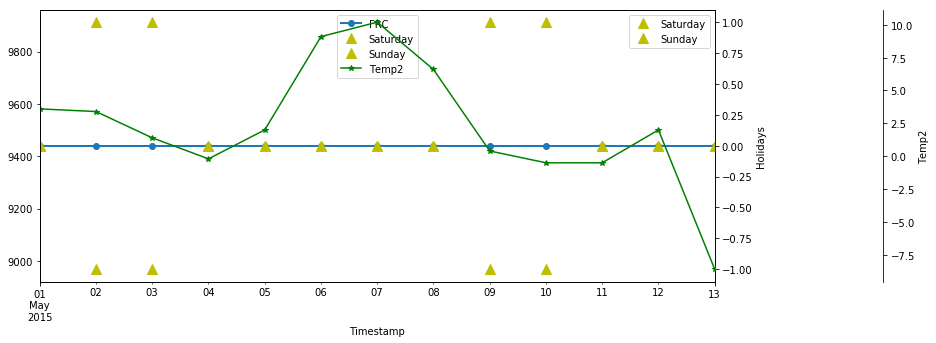

In [169]:
fig, ax = plt.subplots(figsize=(15,5))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.set_ylabel('Temp2')
fig.subplots_adjust(right=0.75)

frc_arimax[['FRC']].tail(186).plot(ax = ax,marker = 'o', linewidth=2.0)
frc_arimax[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='y', marker = '^', markersize = 10.0, linewidth=0.0)
frc_arimax['Temp2'].tail(186).plot(ax = ax3,  style='g-', marker='*')

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')

In [ ]:
# Practice: build the forecast of original TS


In [ ]:
# Practice: calculate MAPE for dates > 2015-05-01


In [ ]:
# energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates={'Timestamp': pd.to_datetime('Date', errors='coerce')}, index_col='Timestamp')
energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
energy_ts.index.names=['Timestamp']
energy_ts.head()
# Filter only Hub=Center and ZSP=FZSZOE27
energy_ts= energy_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]
energy_ts.tail()

# See Year-Seasonality
energy_ts['EnergyConsump'].plot(figsize=(15,5))

# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_YearSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

# See Week easonality
energy_ts['EnergyConsump'].tail(186).plot(figsize=(15,5))

# re_energy = week_reshaping(energy_ts[['EnergyConsump']])
week_df = pd.DataFrame(index = energy_ts.index, columns = {'EnergyConsump', 'dayofweek', 'weekno'})
week_df['EnergyConsump'] = energy_ts['EnergyConsump']
week_df['dayofweek'] = week_df.index.dayofweek
week_df['weekno'] = week_df.index.week
week_df.head(10)

# See dependence on other varibales
fig, ax = plt.subplots(figsize=(15,5))
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

energy_ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
energy_ts[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)
energy_ts['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax3.get_lines() #  ax2.get_lines() 
ax.legend(lines, [l.get_label() for l in lines], loc='lower left')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) # 
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

* **candidates values for q (according to ACF)** - 1, 9, 10 (don't look at 12 or greater: it's larger than period of seasonality)
* **candidates values for p (according to PACF)** - 1, 9 (don't look at 12 or greater: it's larger than period of seasonality)

In [ ]:
## Choosing best model accoridng to AIC criterion
arima_mod111 = sm.tsa.ARIMA(sdiff_ts_wage_boxcox, (1,1,1)).fit()
print(arima_mod111.params)
print(arima_mod111.aic, arima_mod111.bic, arima_mod111.hqic)

const                 -0.000834
ar.L1.D.wage_boxcox   -0.539578
ma.L1.D.wage_boxcox    0.337118
dtype: float64
-991.4569907187226 -978.184510743 -986.088031868


In [ ]:
## Choosing best model accoridng to AIC, BIC criteria
arma_mod119 = sm.tsa.ARIMA(sdiff_ts_wage_boxcox, (1,1,9)).fit()
print(arima_mod119.params)
print(arima_mod119.aic, arima_mod119.bic, arima_mod119.hqic)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
## Choosing best model accoridng to AIC, BIC criteria
arma_mod1110 = sm.tsa.ARIMA(sdiff_ts_wage_boxcox, (1,1,10)).fit()
print(arima_mod1110.params)
print(arima_mod1110.aic, arima_mod1110.bic, arima_mod1110.hqic)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [ ]:
## Choosing best model accoridng to AIC, BIC criteria
arima_mod911 = sm.tsa.ARIMA(sdiff_ts_wage_boxcox, (9,1,1)).fit()
print(arima_mod911.params)
print(arima_mod911.aic, arima_mod911.bic, arima_mod911.hqic)

const                 -0.000846
ar.L1.D.wage_boxcox   -0.909261
ar.L2.D.wage_boxcox   -0.066992
ar.L3.D.wage_boxcox    0.047736
ar.L4.D.wage_boxcox    0.039425
ar.L5.D.wage_boxcox    0.058467
ar.L6.D.wage_boxcox    0.068016
ar.L7.D.wage_boxcox    0.006379
ar.L8.D.wage_boxcox   -0.082354
ar.L9.D.wage_boxcox    0.073923
ma.L1.D.wage_boxcox    0.761500
dtype: float64
-988.2653500338749 -948.447910108 -972.158473483


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
## Choosing best model accoridng to AIC, BIC criteria
arima_mod919 = sm.tsa.ARIMA(sdiff_ts_wage_boxcox, (9,1,9)).fit()
print(arima_mod919.params)
print(arima_mod919.aic, arima_mod919.bic, arima_mod919.hqic)

const                 -0.000976
ar.L1.D.wage_boxcox   -0.150403
ar.L2.D.wage_boxcox    0.519736
ar.L3.D.wage_boxcox    0.275666
ar.L4.D.wage_boxcox    0.275282
ar.L5.D.wage_boxcox   -0.024404
ar.L6.D.wage_boxcox   -0.182132
ar.L7.D.wage_boxcox   -0.598245
ar.L8.D.wage_boxcox   -0.227851
ar.L9.D.wage_boxcox    0.698578
ma.L1.D.wage_boxcox   -0.049985
ma.L2.D.wage_boxcox   -0.570083
ma.L3.D.wage_boxcox   -0.284679
ma.L4.D.wage_boxcox   -0.279555
ma.L5.D.wage_boxcox    0.281655
ma.L6.D.wage_boxcox    0.261406
ma.L7.D.wage_boxcox    0.597745
ma.L8.D.wage_boxcox   -0.007092
ma.L9.D.wage_boxcox   -0.943805
dtype: float64
-1004.279374514849 -937.916974638 -977.434580264


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
## Choosing best model accoridng to AIC, BIC criteria
arima_mod9110 = sm.tsa.ARIMA(sdiff_ts_wage_boxcox, (9,1,10)).fit()
print(arima_mod9110.params)
print(arima_mod9110.aic, arima_mod9110.bic, arima_mod9110.hqic)

const                  -0.000956
ar.L1.D.wage_boxcox    -0.332327
ar.L2.D.wage_boxcox     0.485708
ar.L3.D.wage_boxcox     0.249135
ar.L4.D.wage_boxcox     0.163675
ar.L5.D.wage_boxcox     0.128084
ar.L6.D.wage_boxcox    -0.110585
ar.L7.D.wage_boxcox    -0.600725
ar.L8.D.wage_boxcox    -0.135955
ar.L9.D.wage_boxcox     0.660917
ma.L1.D.wage_boxcox     0.111328
ma.L2.D.wage_boxcox    -0.665728
ma.L3.D.wage_boxcox    -0.238999
ma.L4.D.wage_boxcox    -0.057646
ma.L5.D.wage_boxcox     0.075386
ma.L6.D.wage_boxcox     0.261861
ma.L7.D.wage_boxcox     0.663913
ma.L8.D.wage_boxcox    -0.231085
ma.L9.D.wage_boxcox    -0.951199
ma.L10.D.wage_boxcox    0.034378
dtype: float64
-995.7245159431063 -926.043996072 -967.537481979


C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



* According to AIC criterion arma_mod919 is best of this 6 models

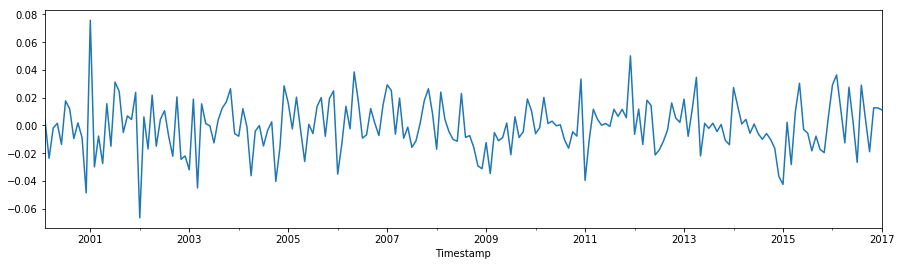

In [ ]:
# plot residuals
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax = arima_mod919.resid.plot(ax=ax, figsize=(15,4));

Values of the TS are not correlated

In [ ]:
# Darbin_Watson statistic
sm.stats.durbin_watson(arima_mod919.resid.values)

2.0933382031995951

In [ ]:
stat = stats.wilcoxon(arima_mod919.resid.values)
print('Statistic: %f\npvalue: %.2f' %(stat[0], stat[1]))

Statistic: 10183.000000
pvalue: 0.75


Residuals are not biased!

# Online forecasting with ARIMA

In [ ]:
def myARMA(x, h, Params): # see statsmodels.ARMA
    
    # Параметры алгоритма
    p = Params['p']
    q = Params['q']
    
    start = ts.index[-1]+timedelta(1)
    end = ts.index[-1]+timedelta(h)
    rng = pd.date_range(start, end)
    frc_ts = pd.Series(index = x.index.append(rng))

    for t in range(len(x.index)): #
#         y = pd.Series(index = x.index[:t+1]
        y = x[:t+1]
        if not y.dropna().empty:
    #        return frc_ts
    #    else:
            try:
                arma_mod = sm.tsa.ARMA(y.dropna(), (p,q)).fit()
#                 frc_ts[t+h-1] = arma_mod.predict(start = y.index[-1]) # get last forecasting value
                frc_ts[t+h-1] = arma_mod.forecast(steps = h)[-1] # get last forecasting value
            except Exception:
                print("Can not fit model p=%d, q=%d at step t=%d!" % (p, q, t))
        
    # Извлекаем прогноз
    #start = notnan_x.index[0].to_datetime().strftime("%Y-%m-%d")
    #end = notnan_x.index[len(notnan_x)-1].to_datetime().strftime("%Y-%m-%d")

    return frc_ts.ffill()

In [ ]:
# Caution: takes a lot of time

P = [1]
h = 1
q = 0
ts_num = 4

for p_cntr in P:
    frc_ts = pd.DataFrame(index = ts.index.append(rng))
    Params ={'p':p_cntr, 'q': q}
    for ts_num in ts.columns[4]:
        x = ts[ts_num]
        frc_ts[ts_num] = myARMA(x, h, Params)
    FRC_TS['ARMA p={1}, q={0}'.format(p_cntr,q)] = frc_ts

Can not fit model p=1, q=0 at step t=721!
Can not fit model p=1, q=0 at step t=722!
Can not fit model p=1, q=0 at step t=732!
Can not fit model p=1, q=0 at step t=733!
Can not fit model p=1, q=0 at step t=734!
Can not fit model p=1, q=0 at step t=735!
Can not fit model p=1, q=0 at step t=736!
Can not fit model p=1, q=0 at step t=741!
Can not fit model p=1, q=0 at step t=742!
Can not fit model p=1, q=0 at step t=751!
Can not fit model p=1, q=0 at step t=779!
Can not fit model p=1, q=0 at step t=810!
Can not fit model p=1, q=0 at step t=840!
Can not fit model p=1, q=0 at step t=871!
Can not fit model p=1, q=0 at step t=887!
Can not fit model p=1, q=0 at step t=901!
Can not fit model p=1, q=0 at step t=932!
Can not fit model p=1, q=0 at step t=958!
Can not fit model p=1, q=0 at step t=962!
Can not fit model p=1, q=0 at step t=963!
Can not fit model p=1, q=0 at step t=971!
Can not fit model p=1, q=0 at step t=972!
Can not fit model p=1, q=0 at step t=978!
Can not fit model p=1, q=0 at step

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=163!
Can not fit model p=1, q=0 at step t=165!
Can not fit model p=1, q=0 at step t=166!
Can not fit model p=1, q=0 at step t=167!
Can not fit model p=1, q=0 at step t=168!
Can not fit model p=1, q=0 at step t=172!
Can not fit model p=1, q=0 at step t=174!
Can not fit model p=1, q=0 at step t=177!
Can not fit model p=1, q=0 at step t=178!
Can not fit model p=1, q=0 at step t=179!
Can not fit model p=1, q=0 at step t=180!
Can not fit model p=1, q=0 at step t=181!
Can not fit model p=1, q=0 at step t=183!
Can not fit model p=1, q=0 at step t=187!
Can not fit model p=1, q=0 at step t=188!
Can not fit model p=1, q=0 at step t=190!
Can not fit model p=1, q=0 at step t=191!
Can not fit model p=1, q=0 at step t=192!
Can not fit model p=1, q=0 at step t=193!
Can not fit model p=1, q=0 at step t=195!
Can not fit model p=1, q=0 at step t=196!
Can not fit model p=1, q=0 at step t=197!
Can not fit model p=1, q=0 at step t=198!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=891!
Can not fit model p=1, q=0 at step t=894!
Can not fit model p=1, q=0 at step t=895!
Can not fit model p=1, q=0 at step t=896!
Can not fit model p=1, q=0 at step t=898!
Can not fit model p=1, q=0 at step t=899!
Can not fit model p=1, q=0 at step t=902!
Can not fit model p=1, q=0 at step t=907!
Can not fit model p=1, q=0 at step t=908!
Can not fit model p=1, q=0 at step t=909!
Can not fit model p=1, q=0 at step t=910!
Can not fit model p=1, q=0 at step t=911!
Can not fit model p=1, q=0 at step t=912!
Can not fit model p=1, q=0 at step t=913!
Can not fit model p=1, q=0 at step t=914!
Can not fit model p=1, q=0 at step t=915!
Can not fit model p=1, q=0 at step t=916!
Can not fit model p=1, q=0 at step t=917!
Can not fit model p=1, q=0 at step t=918!
Can not fit model p=1, q=0 at step t=919!
Can not fit model p=1, q=0 at step t=920!
Can not fit model p=1, q=0 at step t=921!
Can not fit model p=1, q=0 at step t=922!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=127!
Can not fit model p=1, q=0 at step t=128!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=129!
Can not fit model p=1, q=0 at step t=130!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=131!
Can not fit model p=1, q=0 at step t=132!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=133!
Can not fit model p=1, q=0 at step t=134!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=135!
Can not fit model p=1, q=0 at step t=136!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=137!
Can not fit model p=1, q=0 at step t=138!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=139!
Can not fit model p=1, q=0 at step t=140!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=141!
Can not fit model p=1, q=0 at step t=142!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=143!
Can not fit model p=1, q=0 at step t=144!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=145!
Can not fit model p=1, q=0 at step t=146!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=147!
Can not fit model p=1, q=0 at step t=148!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=149!
Can not fit model p=1, q=0 at step t=150!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=151!
Can not fit model p=1, q=0 at step t=152!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=153!
Can not fit model p=1, q=0 at step t=157!
Can not fit model p=1, q=0 at step t=158!
Can not fit model p=1, q=0 at step t=159!
Can not fit model p=1, q=0 at step t=160!
Can not fit model p=1, q=0 at step t=161!
Can not fit model p=1, q=0 at step t=162!
Can not fit model p=1, q=0 at step t=163!
Can not fit model p=1, q=0 at step t=164!
Can not fit model p=1, q=0 at step t=165!
Can not fit model p=1, q=0 at step t=166!
Can not fit model p=1, q=0 at step t=167!
Can not fit model p=1, q=0 at step t=168!
Can not fit model p=1, q=0 at step t=169!
Can not fit model p=1, q=0 at step t=170!
Can not fit model p=1, q=0 at step t=171!
Can not fit model p=1, q=0 at step t=172!
Can not fit model p=1, q=0 at step t=173!
Can not fit model p=1, q=0 at step t=174!
Can not fit model p=1, q=0 at step t=175!
Can not fit model p=1, q=0 at step t=176!
Can not fit model p=1, q=0 at step t=177!
Can not fit model p=1, q=0 at step t=178!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=1312!
Can not fit model p=1, q=0 at step t=1322!
Can not fit model p=1, q=0 at step t=1386!
Can not fit model p=1, q=0 at step t=1435!
Can not fit model p=1, q=0 at step t=1451!
Can not fit model p=1, q=0 at step t=1452!
Can not fit model p=1, q=0 at step t=1453!
Can not fit model p=1, q=0 at step t=1468!
Can not fit model p=1, q=0 at step t=1469!
Can not fit model p=1, q=0 at step t=1470!
Can not fit model p=1, q=0 at step t=1471!
Can not fit model p=1, q=0 at step t=1472!
Can not fit model p=1, q=0 at step t=1474!
Can not fit model p=1, q=0 at step t=1475!
Can not fit model p=1, q=0 at step t=1476!
Can not fit model p=1, q=0 at step t=1477!
Can not fit model p=1, q=0 at step t=1478!
Can not fit model p=1, q=0 at step t=1479!
Can not fit model p=1, q=0 at step t=1480!
Can not fit model p=1, q=0 at step t=1481!
Can not fit model p=1, q=0 at step t=1482!
Can not fit model p=1, q=0 at step t=1483!
Can not fit model p=1, q=0 at step t=1484!
Can not fi

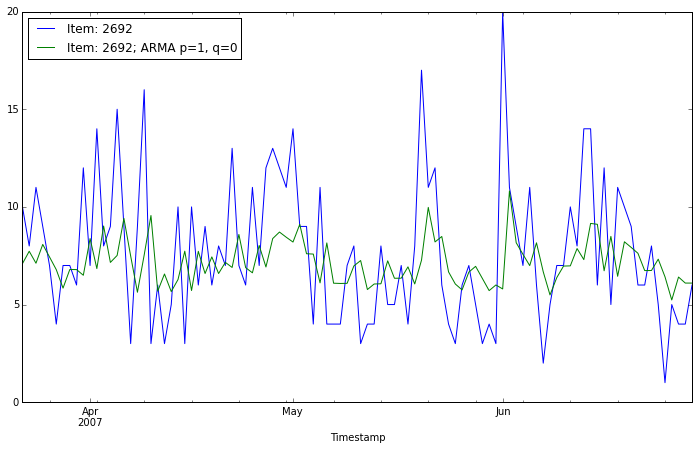

In [ ]:
# ts VS forecast in first 100 steps
model_num = [0]  # [0,6], [0,4,6]
Models = sorted(FRC_TS.keys())

ts_num = 4 # 7
plot_ts = pd.DataFrame(index =ts.index)
plot_ts[ts.columns[ts_num]] = ts[ts.columns[ts_num]]
for model in model_num:
     frc_ts = FRC_TS[Models[model]]
     plot_ts[ts.columns[ts_num]+'; '+Models[model]] = frc_ts[ts.columns[ts_num]]

plot_ts.loc[800:900].plot(figsize = (12, 7)) # :250

In [ ]:
# Quality 
print('MACAPE: %.2f'% qualityMACAPE(ts[ts.columns[ts_num]], frc_ts[ts.columns[ts_num]])[0])
print('RMSE: %.1f'% qualityRMSE(ts[ts.columns[ts_num]], frc_ts[ts.columns[ts_num]])[0])

MACAPE: 0.50
RMSE: 3.9


# Conclusion
## Self-check questions
  1. What is autocorrelation function (ACF)?
  2. What does coefficient of correlation show?
  3. What is partial autocorrelation function (PACF)?  What does coefficient of partial correlation show?
  4. How do ACF and PACF help to choose p and q of ARMA model?


** Materials **
* Автокорреляционный анализ при построении ARMA, ARIMA
    - Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
    - https://onlinecourses.science.psu.edu/stat510/node/62
    - http://www.autobox.com/cms/index.php/blog/entry/build-or-make-your-own-arima-forecasting-model

* Autocorrelation analysis

https://onlinecourses.science.psu.edu/stat510/node/62

http://www.autobox.com/cms/index.php/blog/entry/build-or-make-your-own-arima-forecasting-model

http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.acf.html

** HW2 ** 
  * yout fitback about <a href="https://goo.gl/forms/SIa0Elv5PrrEnwwa2"> this seminar </a>